In [1]:
# Importing packages

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.svm import SVC # Support vector classifier
from sklearn.datasets.samples_generator import make_blobs
from sklearn.datasets.samples_generator import make_circles

In [2]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # Create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # Plot decision boundary and margins
    ax.contour(X, Y, P, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
    
    # Circle support vector points (i.e., data points on margins)
    for index in range(len(model.support_vectors_)):
        ax.plot(model.support_vectors_[index][0], model.support_vectors_[index][1], 'ko', 
                fillstyle='none', markersize=20, markeredgewidth=2)
    
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

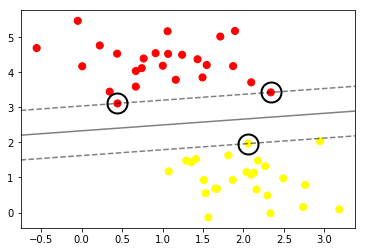

In [3]:
# Linear discriminative classification

Xlinear, ylinear = make_blobs(n_samples=50, centers=2, random_state=0, cluster_std=0.60) # Random data generation
linearsvcmodel = SVC(kernel='linear', C=1E10) # Instantiating linear SVC
linearsvcmodel.fit(Xlinear, ylinear) # Fitting linear SVC model

# Plotting random data, SVM decision boundary, and SVM margins

plt.scatter(Xlinear[:, 0], Xlinear[:, 1], c=ylinear, s=50, cmap='autumn')
plot_svc_decision_function(linearsvcmodel)

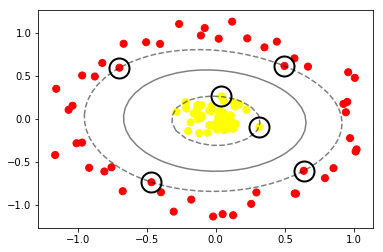

In [4]:
# Kernelized SVM for circular boundary (kernel = radial basis function)

Xradial, yradial = make_circles(n_samples=100, factor=.1, noise=.1) # Random data generation
radialsvcmodel = SVC(kernel='rbf', C=1E6)
radialsvcmodel.fit(Xradial, yradial)

# Plotting random data, kernelized SVM decision boundary, and SVM margins

plt.scatter(Xradial[:, 0], Xradial[:, 1], c=yradial, s=50, cmap='autumn')
plot_svc_decision_function(radialsvcmodel)

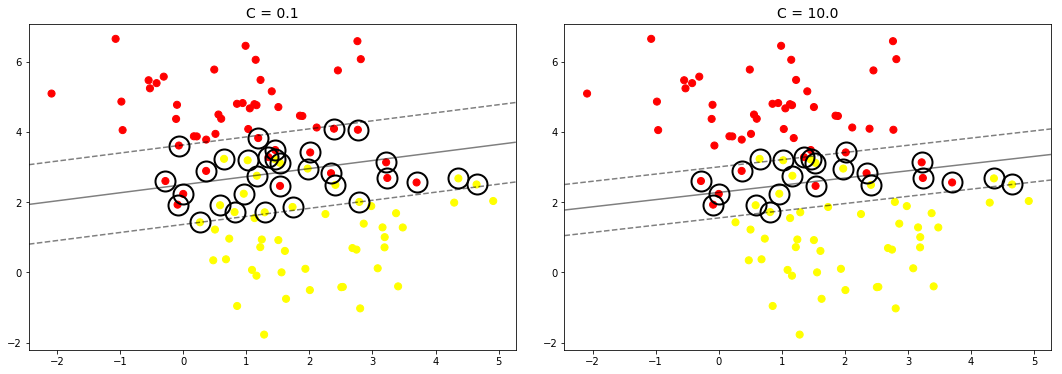

In [5]:
# Softened margins for SVC on overlapping data; controlled by hyperparameter C in SVC function

Xoverlap, yoverlap = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=1.2) # Random data generation

# Plotting the difference between C = 0.1 and C = 10 in SVC fit

Cvalues = [0.1, 10]

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for axindex, Cindex in zip(ax, Cvalues):
    model = SVC(kernel='linear', C=Cindex).fit(Xoverlap, yoverlap)
    axindex.scatter(Xoverlap[:, 0], Xoverlap[:, 1], c=yoverlap, s=50, cmap='autumn')
    plot_svc_decision_function(model, axindex)
    axindex.set_title('C = {0:.1f}'.format(Cindex), size=14)